# National CO2 footprint

## Introdução

A variável National CO2 footprint é um dos mais importantes indicadores ambientais e socioeconômicos da atualidade. Ela mede a quantidade total de dióxido de carbono (CO2) emitido por uma nação em atividades como geração de energia, transporte, indústrias e desmatamento, tornando-se um reflexo direto do impacto de uma sociedade no meio ambiente. O aumento contínuo das emissões de CO2 tem consequências devastadoras para o planeta, impulsionando o aquecimento global, acelerando as mudanças climáticas e desencadeando uma série de efeitos negativos, desde a elevação do nível do mar até eventos climáticos extremos. 

<br>

Entender e monitorar o CO2 footprint de cada nação é crucial para a formulação de políticas ambientais eficazes, porque ele oferece uma visão clara da contribuição de um país para as emissões globais e a urgência de adotar práticas mais sustentáveis. Este indicador também revela desigualdades: nações desenvolvidas, com maior industrialização, tendem a ter pegadas de carbono mais altas, enquanto os países em desenvolvimento sofrem as consequências, embora sejam responsáveis por uma fração menor das emissões.

<br>

Precisamos nos atentar ao National CO2 footprint porque ele vai além de uma simples métrica ambiental. Ele reflete as escolhas econômicas, energéticas e políticas de uma nação, e suas implicações são globais. Para garantir um futuro habitável, é vital reduzir essas emissões, investir em tecnologias limpas e alcançar um equilíbrio entre desenvolvimento econômico e sustentabilidade ambiental. O que está em jogo é o futuro das próximas gerações e a saúde do planeta que compartilhamos.

Importando as bibliotecas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Lendo o arquivo tratado

In [6]:
df = pd.read_csv('combined_WID_cleaned.csv')
df.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
0,p0p100,1917,1168229.0,New Jersey,Population,Population,tax unit,Adults,population
1,p0p100,1918,1178440.0,New Jersey,Population,Population,tax unit,Adults,population
2,p0p100,1919,1204412.0,New Jersey,Population,Population,tax unit,Adults,population
3,p0p100,1920,1238146.0,New Jersey,Population,Population,tax unit,Adults,population
4,p0p100,1921,1279734.0,New Jersey,Population,Population,tax unit,Adults,population


Filtrando os resultados para:

- indicador  = National CO2 footprint

- tipo = Total emissions

In [7]:

df_co2 = df[(df['indicador'] == 'National CO2 footprint') & (df['tipo'] == 'Total emissions')]

In [8]:
df_co2.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
9042,p0p100,1990,0.295062,the British Virgin Islands,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
9043,p0p100,1991,0.300091,the British Virgin Islands,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
9044,p0p100,1992,0.305120,the British Virgin Islands,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
9045,p0p100,1993,0.310149,the British Virgin Islands,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
9046,p0p100,1994,0.315179,the British Virgin Islands,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e


## 1 - Comparando todos os paises

In [9]:
fig = px.line(df_co2, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="National CO2 Footprint Over Time by Country",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


## 2 - Top 10 paises com as maiores emissoes totais de CO2 comparados com o Brasil

In [10]:
df_co2_pivot = df_co2.pivot_table(index='pais', values='valor', aggfunc='median')

In [11]:
df_co2_ordered = df_co2_pivot.sort_values(by='valor', ascending=False)
df_co2_ordered

,valor
pais,
the World,28445.401820
Asia,13136.016941
Asia (excluding Middle East),9827.783528
Americas,8142.037694
East Asia,7178.553644
...,...
Liechtenstein,0.339711
Samoa,0.288085
Monaco,0.262280


In [12]:
brazil_df = df_co2_ordered.query("pais == 'Brazil'")

top_10_df = df_co2_ordered.head(10)

result_co2_df = pd.concat([brazil_df, top_10_df]).drop_duplicates()

result_co2_df

,valor
pais,
Brazil,340.378580
the World,28445.401820
Asia,13136.016941
Asia (excluding Middle East),9827.783528
Americas,8142.037694
East Asia,7178.553644
North America & Oceania,6784.449486
North America,6357.746756
the USA,5798.995960


In [13]:
country_name_list = list(result_co2_df.index)
country_name_list

['Brazil',
 'the World',
 'Asia',
 'Asia (excluding Middle East)',
 'Americas',
 'East Asia',
 'North America & Oceania',
 'North America',
 'the USA',
 'Europe',
 'China']

In [14]:
df_co2_filtered = df_co2.query(f'pais in {country_name_list}')
df_co2_filtered

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
8439217,p0p100,1990,234.535967,Brazil,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
8439218,p0p100,1991,240.812000,Brazil,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
8439219,p0p100,1992,240.218483,Brazil,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
8439220,p0p100,1993,248.252990,Brazil,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
8439221,p0p100,1994,262.145068,Brazil,National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
...,...,...,...,...,...,...,...,...,...
49216176,p0p100,2016,15510.023108,Asia (excluding Middle East),National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
49216177,p0p100,2017,15791.688573,Asia (excluding Middle East),National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
49216178,p0p100,2018,16289.245076,Asia (excluding Middle East),National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e
49216179,p0p100,2019,16554.240319,Asia (excluding Middle East),National CO2 footprint,Total emissions,individuals,All Ages,MtCO2e


In [15]:
fig = px.line(df_co2_filtered, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Top 10 paises com maiores CO2 Footprint",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


## 3 - Filtrando por alguns paises em espeficico

In [16]:
paises = ['Brazil', 'China', 'France', 'the USA', 'Canada', 'Japan', 'the Russian Federation', 'Mexico', 'Australia', 'India']

In [17]:
df_paises_espec = df_co2.query(f'pais in {paises}')
df_paises_espec['pais'].unique()

array(['Mexico', 'Canada', 'Brazil', 'India', 'the Russian Federation',
       'France', 'Japan', 'China', 'the USA', 'Australia'], dtype=object)

In [18]:
fig = px.line(df_paises_espec, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="CO2 Footprint - Comparativo entre Países",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


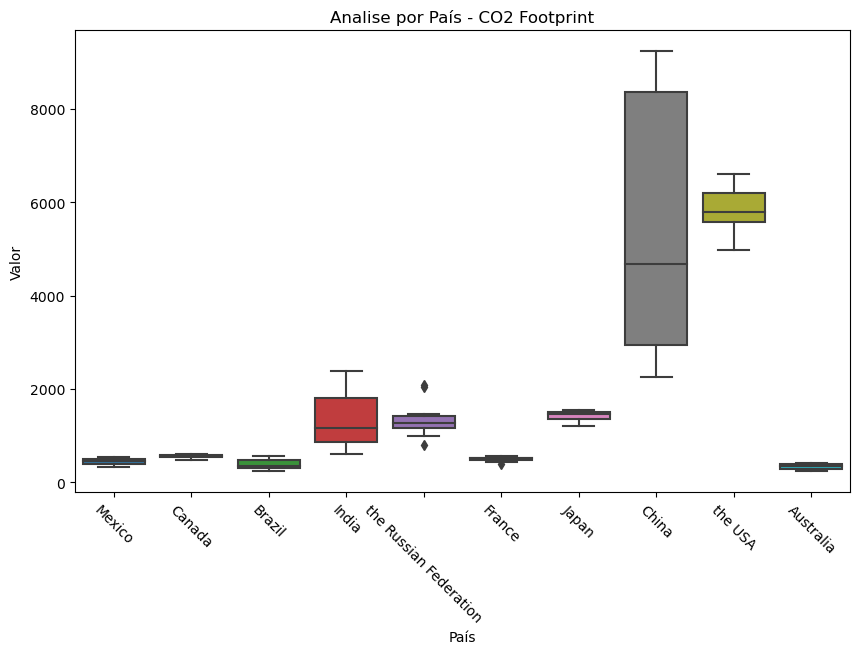

In [19]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='pais', y='valor', data=df_paises_espec)

plt.xticks(rotation=-45)

plt.title('Analise por País - CO2 Footprint')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

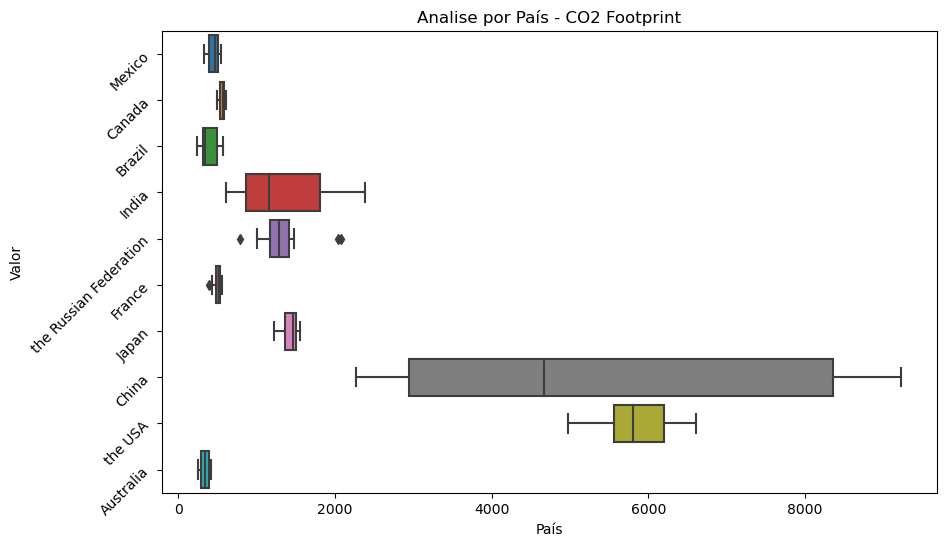

In [20]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_paises_espec)

plt.yticks(rotation=45)

plt.title('Analise por País - CO2 Footprint')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

Filtrando os resultados para:

- indicador  = National CO2 footprint

- tipo = Per-capita emissions

In [21]:
df_co2_pce = df[(df['indicador'] == 'National CO2 footprint') & (df['tipo'] == 'Per-capita emissions')]

## 1 - Comparando todos os paises

In [22]:
fig = px.line(df_co2_pce, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="National CO2 Footprint Over Time by Country - Per Capita",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


## 2 - Top 10 paises com as maiores emissoes per-capita de CO2 comparados com o Brasil

In [23]:
df_co2_pivot_pce = df_co2_pce.pivot_table(index='pais', values='valor', aggfunc='median')
df_co2_pce_ordered = df_co2_pivot_pce.sort_values(by='valor', ascending=False)
df_co2_pce_ordered

,valor
pais,
Guyana,44.122959
Luxembourg,33.748676
the United Arab Emirates,30.667799
Qatar,28.295385
Singapore,24.292484
...,...
Sudan,0.100929
Chad,0.078030
Burundi,0.076092


In [24]:
brazil_pce_df = df_co2_pce_ordered.query("pais == 'Brazil'")

top_10_pce_df = df_co2_pce_ordered.head(10)

result_co2_pce_df = pd.concat([brazil_pce_df, top_10_pce_df]).drop_duplicates()

result_co2_pce_df

,valor
pais,
Brazil,1.946248
Guyana,44.122959
Luxembourg,33.748676
the United Arab Emirates,30.667799
Qatar,28.295385
Singapore,24.292484
Kuwait,23.918139
the USA,20.140165
San Marino,20.122738


In [25]:
country_name_pce_list = list(result_co2_pce_df.index)
country_name_pce_list

['Brazil',
 'Guyana',
 'Luxembourg',
 'the United Arab Emirates',
 'Qatar',
 'Singapore',
 'Kuwait',
 'the USA',
 'San Marino',
 'North America',
 'North America & Oceania']

In [26]:
df_co2_pce_filtered = df_co2_pce.query(f'pais in {country_name_pce_list}')
df_co2_pce_filtered

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
8439814,p0p100,1990,1.574033,Brazil,National CO2 footprint,Per-capita emissions,individuals,All Ages,tCO2e
8439815,p0p100,1991,1.587967,Brazil,National CO2 footprint,Per-capita emissions,individuals,All Ages,tCO2e
8439816,p0p100,1992,1.557238,Brazil,National CO2 footprint,Per-capita emissions,individuals,All Ages,tCO2e
8439817,p0p100,1993,1.582751,Brazil,National CO2 footprint,Per-capita emissions,individuals,All Ages,tCO2e
8439818,p0p100,1994,1.644236,Brazil,National CO2 footprint,Per-capita emissions,individuals,All Ages,tCO2e
...,...,...,...,...,...,...,...,...,...
44924574,p0p100,2016,16.849838,North America & Oceania,National CO2 footprint,Per-capita emissions,individuals,All Ages,NaN
44924575,p0p100,2017,16.723875,North America & Oceania,National CO2 footprint,Per-capita emissions,individuals,All Ages,NaN
44924576,p0p100,2018,17.070957,North America & Oceania,National CO2 footprint,Per-capita emissions,individuals,All Ages,NaN
44924577,p0p100,2019,16.567377,North America & Oceania,National CO2 footprint,Per-capita emissions,individuals,All Ages,NaN


In [27]:
fig = px.line(df_co2_pce_filtered, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Top 10 paises com maiores CO2 Footprint per-capita",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


## 3 - Filtrando por alguns paises em espeficico

In [28]:
paises = ['Brazil', 'China', 'France', 'the USA', 'Canada', 'Japan', 'the Russian Federation', 'Mexico', 'Australia', 'India']

In [29]:
df_paises_espec_pce = df_co2_pce.query(f'pais in {paises}')
df_paises_espec_pce['pais'].unique()

array(['Mexico', 'Canada', 'Brazil', 'India', 'the Russian Federation',
       'France', 'Japan', 'China', 'the USA', 'Australia'], dtype=object)

In [30]:
fig = px.line(df_paises_espec_pce, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="CO2 Footprint Per-Capita - Comparativo entre Países",
              labels={
                  "valor": "CO2 Footprint (MtCO2e)",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


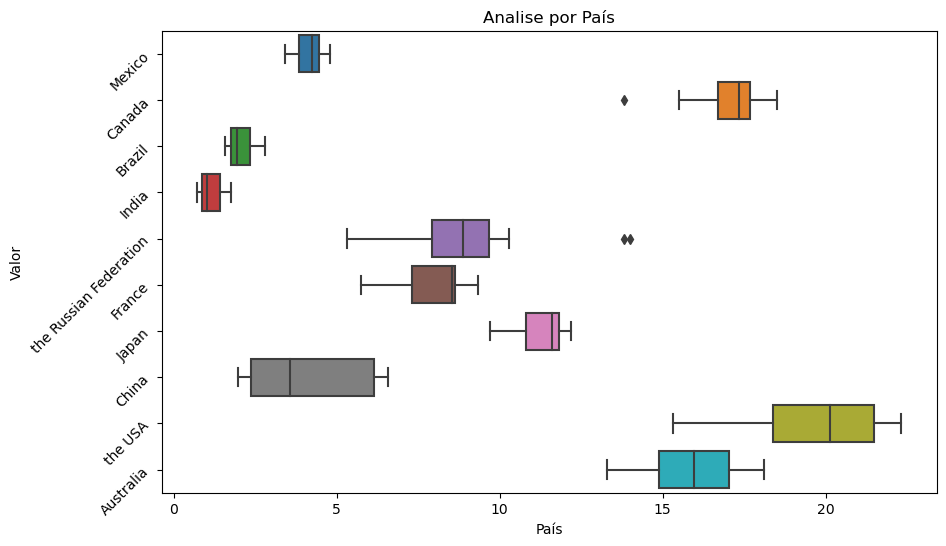

In [31]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_paises_espec_pce)

plt.yticks(rotation=45)

plt.title('Analise por País')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

## Conclusão

A China passou a emitir mais CO₂ a partir dos anos 2000 devido ao seu rápido crescimento econômico e industrialização massiva, que resultaram em um aumento substancial no consumo de energia. Esse processo foi impulsionado pela transformação da China em uma potência industrial global, com um foco significativo na produção de bens de consumo e infraestrutura em larga escala.

Alguns dos principais fatores que explicam o aumento das emissões de CO₂ na China e a sua ultrapassagem dos Estados Unidos em 2009:<br>

1. **Industrialização acelerada**: Nos anos 2000, a China se consolidou como a "fábrica do mundo", produzindo uma vasta gama de produtos para exportação, o que exigiu grande quantidade de energia.<br>

2. **Dependência do carvão**: O setor energético chinês é altamente dependente do carvão, que é uma das fontes de energia mais poluentes. Cerca de 70% da eletricidade da China vinha do carvão, o que contribuiu significativamente para o aumento das emissões de CO₂.<br>

3. **Urbanização em massa**: Com o rápido crescimento econômico, milhões de pessoas migraram das áreas rurais para as cidades, resultando em um boom de construção de infraestrutura, transporte e moradia, exigindo grandes quantidades de energia e aumentando as emissões.<br>

4. **Aumento no consumo de energia**: O crescimento econômico elevou a demanda por energia tanto no setor industrial quanto doméstico. A maior parte dessa energia continuou a ser gerada por fontes de combustíveis fósseis.<br>

5. **Mudanças econômicas globais**: Com a globalização, muitos países transferiram suas indústrias para a China, o que aumentou a pegada de carbono do país. A produção de bens para exportação foi um fator importante no aumento das emissões chinesas.<br>

6. **Estados Unidos estagnados**: Durante esse período, as emissões de CO₂ dos Estados Unidos se estabilizaram e até começaram a diminuir em parte devido à transição para fontes de energia mais limpas e à maior eficiência energética. <br>

Assim, em 2009, a China ultrapassou os Estados Unidos como o maior emissor de CO₂, consolidando-se como o principal contribuidor para o aquecimento global em termos de emissões brutas, ainda que sua emissão per capita permanecesse menor em comparação com países mais industrializados.<br>

**Referencias:** <br>

a - https://www.scielo.br/j/rbpi/a/rXF9y3bRQBdfQdnpM5MV8Jz/ <br>
b - https://www.wri.org/insights/history-carbon-dioxide-emissions <br>
c - https://rhg.com/research/chinas-emissions-surpass-developed-countries/ <br>